In [1]:
import folium # map rendering library
import requests # library to handle requests
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
latitude = 52.372952
longitude = 4.906080

In [35]:
ab_data = pd.read_csv('/content/listings_details.csv',error_bad_lines=False, engine="python")
print(ab_data.shape)
ab_data.head()

Skipping line 888: unexpected end of data


(886, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,...,2,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$100.00,$50.00,1,$20.00,3,15,today,t,17,44,44,44,2018-12-06,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,"From Central Station, walk towards the busstop...",You will have the entire house to yourself.,We will meet you in person for check in whenev...,"Our house comes with our very sweet, but old (...",NaN,NaN,https://a0.muscache.com/im/pictures/88955424/4...,NaN,3806,https://www.airbnb.com/users/show/3806,Maartje,2008-10-24,"Amsterdam, Noord-Holland, The Netherlands",I am a freelance radio producer and journalist...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/3806/profile_...,https://a0.muscache.com/im/users/3806/profile_...,Spaarndammer en Zeeheldenbuurt,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, Noord-Holland, Netherlands",Spaarndammer en Zeeheldenbuurt,Westerpark,...,2,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",NaN,$160.00,$543.00,"$2,000.00",$300.00,$40.00,2,$15.00,4,20,7 weeks ago,t,0,0,0,47,2018-12-06,42,2015-07-31,2018-08-29,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of 

In [36]:
ab_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.3MB/s 
     |████████████████████████████████| 6.5MB 19.5MB/s 
     |████████████████████████████████| 15.3MB 263kB/s 


In [37]:
import geopandas as gpd
geo_ams = gpd.read_file('/content/neighbourhoods.geojson')

In [38]:
geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y
geo_ams.drop('neighbourhood_group', axis=1, inplace=True)
geo_ams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,neighbourhood,geometry,longitude,latitude
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",4.977317,52.320279
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",5.003523,52.398339
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",4.894589,52.415306
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",4.910489,52.394068
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",4.998377,52.360899
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",4.889084,52.376426
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",4.941492,52.371412
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",4.908287,52.367753
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",4.919954,52.357795
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",4.931061,52.342719


In [39]:
ab_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [40]:
columns = ['id', 'name',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'price', 'cleaning_fee', 'guests_included', 'extra_people', 
       'minimum_nights', 'maximum_nights', 
       'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
       'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy']

In [41]:
data_columns = ab_data[columns]
print(data_columns.shape)

(886, 35)


In [42]:
data_columns = data_columns[data_columns['has_availability'] == 't']
data_columns.shape

(886, 35)

In [43]:
data_columns = data_columns[data_columns['availability_30'] != 0]
data_columns = data_columns[data_columns['availability_60'] != 0]
data_columns = data_columns[data_columns['availability_90'] != 0]
data_columns = data_columns[data_columns['availability_365'] != 0]
data_columns.shape

(478, 35)

In [44]:
data_columns.drop(['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)
data_columns.shape

(478, 30)

In [45]:
data_columns = data_columns[data_columns['price'] != 0]
data_columns = data_columns[data_columns['number_of_reviews'] != 0]
data_columns = data_columns[data_columns['review_scores_rating'].notnull()]
data_columns.shape

(472, 30)

In [46]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [47]:
missing_data = examine_missing_values(data_columns)
missing_data.head(20)

,Total,Percent
square_feet,308,65.254237
cleaning_fee,96,20.338983
bathrooms,6,1.271186
review_scores_communication,1,0.211864
bedrooms,1,0.211864
price,0,0.000000
name,0,0.000000
neighbourhood_cleansed,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [48]:
data_columns.drop(['square_feet'], axis=1, inplace=True)
data_columns.shape

(472, 29)

In [49]:
data_columns['review_scores_value'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_location'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_communication'].fillna(data_columns['review_scores_rating'], inplace=True)
data_columns['review_scores_checkin'].fillna(data_columns['review_scores_rating'], inplace=True)

In [50]:
data_columns['bathrooms'].fillna(0, inplace=True)
data_columns['bedrooms'].fillna(0, inplace=True)
data_columns['beds'].fillna(0, inplace=True)

In [51]:
data_columns['cleaning_fee'].fillna(data_columns['cleaning_fee'].mode()[0], inplace=True)

In [52]:
missing_data = examine_missing_values(data_columns)
missing_data.head(20)

,Total,Percent
cancellation_policy,0,0.0
cleaning_fee,0,0.0
name,0,0.0
neighbourhood_cleansed,0,0.0
latitude,0,0.0
longitude,0,0.0
property_type,0,0.0
room_type,0,0.0
accommodates,0,0.0
bathrooms,0,0.0


In [53]:
data_columns.shape

(472, 29)

In [54]:
numeric_features = list(data_columns.dtypes[data_columns.dtypes != 'object'].index)
numeric_features.remove('id')
numeric_features.remove('latitude')
numeric_features.remove('longitude')
numeric_features


['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [55]:
category_features = list(data_columns.dtypes[data_columns.dtypes == 'object'].index)
category_features.remove('name')
category_features

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'price',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

In [56]:
data_columns['price'] = data_columns['price'].apply(lambda x:x.lstrip('$'))
data_columns['price'] = data_columns['price'].apply(lambda x:x.replace(',',''))
data_columns['price'] = data_columns['price'].astype('float')
data_columns['cleaning_fee'] = data_columns['cleaning_fee'].apply(lambda x:x.lstrip('$'))
data_columns['cleaning_fee'] = data_columns['cleaning_fee'].astype('float')
data_columns['extra_people'] = data_columns['extra_people'].apply(lambda x:x.lstrip('$'))
data_columns['extra_people'] = data_columns['extra_people'].astype('float')

In [57]:
numeric_features.extend(['cleaning_fee', 'extra_people'])
numeric_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cleaning_fee',
 'extra_people']

In [58]:
category_features.remove('price')
category_features.remove('cleaning_fee')
category_features.remove('extra_people')

In [59]:
data_columns.columns = ['neighbourhood' if x=='neighbourhood_cleansed' else x for x in data_columns.columns]
features = data_columns
print(features.shape)
features.head()

(472, 29)


,id,name,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,2,1.5,1.0,2,Real Bed,59.0,50.0,1,20.0,3,15,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,strict_14_with_grace_period
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,1.0,1.0,1,Real Bed,125.0,40.0,2,10.0,14,60,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,52.386727,4.892078,Houseboat,Private room,2,1.0,1.0,1,Real Bed,150.0,0.0,1,0.0,2,730,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period
5,28658,Cosy guest room near city centre -1,Bos en Lommer,52.375342,4.857289,Apartment,Private room,2,1.0,1.0,2,Real Bed,65.0,15.0,2,0.0,3,15,434,93.0,9.0,10.0,10.0,9.0,9.0,9.0,f,f,moderate
6,28871,Comfortable double room,Centrum-West,52.367187,4.890918,Apartment,Private room,2,0.0,1.0,1,Real Bed,75.0,50.0,1,0.0,2,1825,215,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate


In [60]:
category_features.remove('neighbourhood_cleansed')
category_features.append('neighbourhood')
category_features

['property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'neighbourhood']

In [61]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [62]:
def one_hot_encode(data, columns):
    onehot = pd.get_dummies(data[columns])
    onehot['id'] = data['id']
    # move id column to the first column
    fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
    onehot = onehot[fixed_columns]
    return onehot

In [63]:
features_onehot = one_hot_encode(features, category_features)
features_onehot.head()

,id,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Condominium,property_type_Guest suite,property_type_House,property_type_Houseboat,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid
0,2818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,25428,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27886,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,28658,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,28871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count     472.000000
mean      179.514831
std       374.993265
min        35.000000
25%        96.000000
50%       136.500000
75%       200.000000
max      8000.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 179.51 and sigma = 374.60



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


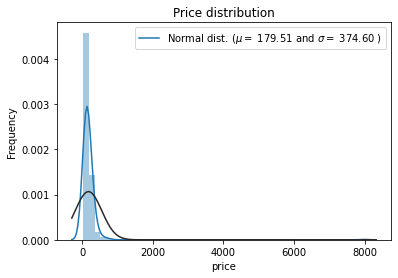

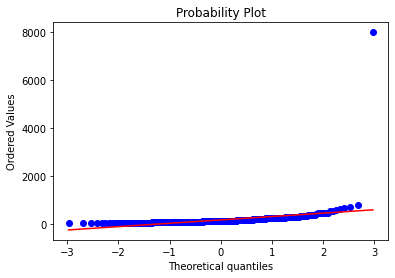

In [66]:
check_dist(features['price'])

In [67]:
features = features[features['price']<2000]

In [68]:
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.95 and sigma = 0.53



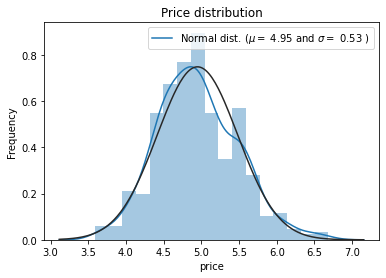

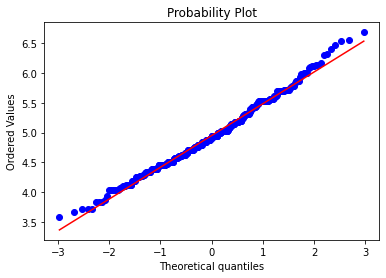

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
features['corrected_price'] = correct_dist(features['price'])

In [70]:
neighbourhood_count = pd.DataFrame({'neighbourhood': features['neighbourhood'].value_counts().index, 
                                    'count': features['neighbourhood'].value_counts().values})
neighbourhood_count.head()

,neighbourhood,count
0,Centrum-West,102
1,Centrum-Oost,73
2,De Baarsjes - Oud-West,72
3,Zuid,38
4,Westerpark,35


In [72]:
map_ams_count = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_count.choropleth(
    geo_data=r'/content/neighbourhoods.geojson',
    data=neighbourhood_count,
    columns=['neighbourhood', 'count'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The number of properites',
    reset=True
)
map_ams_count


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [73]:
neighbourhood_price = features.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
1,Bijlmer-Oost,225.0
4,Centrum-Oost,160.0
5,Centrum-West,160.0
7,De Baarsjes - Oud-West,149.5
3,Buitenveldert - Zuidas,140.0


In [75]:
map_ams_price = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_price.choropleth(
    geo_data=r'/content/neighbourhoods.geojson',
    data=neighbourhood_price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The average_price',
    reset=True
)
map_ams_price

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [76]:
CLIENT_ID = 'H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT' # your Foursquare ID
CLIENT_SECRET = 'JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT
CLIENT_SECRET:JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP


In [77]:
categories = {'Arts & Entertainment': '4d4b7104d754a06370d81259', 
                  'Event': '4d4b7105d754a06373d81259', 
                  'Food': '4d4b7105d754a06374d81259',
                  'Nightlife Spot': '4d4b7105d754a06376d81259',
                  'Outdoors & Recreation': '4d4b7105d754a06377d81259',
                  'Shop & Service': '4d4b7105d754a06378d81259',
                  'Travel & Transport': '4d4b7105d754a06379d81259'}

In [82]:
def getNearbyVenues(data, categories, radius=500, limit=10):
    
    venues_list=[]
    print('Obtaining venues around the neighbourhoods: ', end='')
    for name, lat, lng in zip(data['neighbourhood'], data['latitude'], data['longitude']):
        print('.', end='')
        # create the API request URL
        venues = {'neighbourhood':name}
        for category, category_id in categories.items():
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                category_id,
                radius, 
                limit)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items'] 
            venues[category] = len(results)
        venues_list.append(venues)

    venues_list = pd.DataFrame(venues_list)
    return venues_list